In [2]:
import numpy as np
from sklearn.datasets import load_digits
import gtda.homology
import gtda.diagrams
import matplotlib.pyplot as plt
from  sklearn.preprocessing import StandardScaler
from topconv import topfiltlearn

In [16]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [41]:
#Load data
from tensorflow import keras
mnist = keras.datasets.mnist

(train_images, train_labels), (test_images,test_labels) = mnist.load_data()
X = train_images[:5000]
y = train_labels[:5000]
#digits = load_digits()
#X = np.reshape(digits.data, (len(digits.data),8,8))
#y = digits.target


kNN Results:  [0.3845231  0.40731854 0.40636255]
Gradient Boosting Results:  [0.42171566 0.4445111  0.45918367]


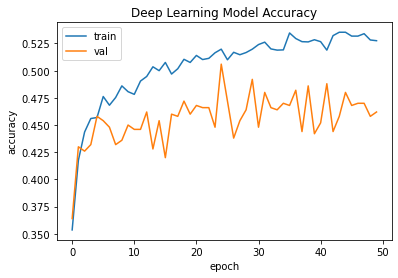

In [42]:
# Baseline : Not Using any filters
topfiltlearn(X,y,[],pool=True)

kNN Results:  [0.3845231  0.40731854 0.40636255]
Gradient Boosting Results:  [0.42111578 0.44571086 0.45858343]


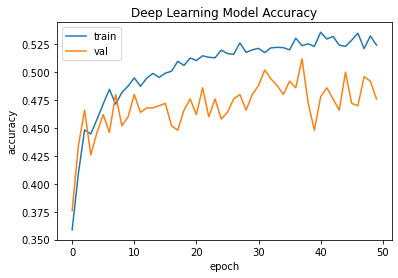

In [43]:
# Using some preset 4x4 filters
from scipy.ndimage import gaussian_filter, sobel, uniform_filter, laplace
A = np.zeros((4,4))
filters = [gaussian_filter(A,sigma=1), sobel(A),uniform_filter(A),laplace(A)]
topfiltlearn(X,y,filters,pool=True)


kNN Results:  [0.44031194 0.44991002 0.43997599]
Gradient Boosting Results:  [0.57528494 0.63947211 0.59543818]


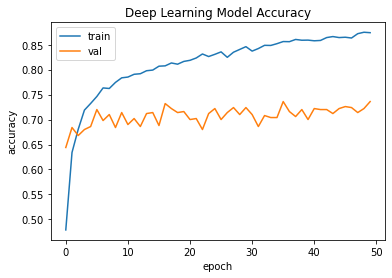

In [44]:
#Using PCA eigenfilters
from sklearn.feature_extraction.image import extract_patches_2d
from sklearn.decomposition import PCA 
patches = []
for im in X:
    patches.extend(extract_patches_2d(im,(4,4)))
#print(np.shape(patches))
patches = np.reshape(patches,(len(patches),16))
pca = PCA(n_components=16)
pca.fit(patches)
#plt.plot(np.cumsum(pca.explained_variance_ratio_))
#print(pca.explained_variance_ratio_)
M = np.asarray(pca.components_[:10]).T
filters = []
for i in range(16):
    weights = np.random.uniform(size=10)
    weights = weights/sum(weights)
    filters.append(np.reshape(np.matmul(M,weights),(4,4)))

topfiltlearn(X,y,filters,pool=True)

kNN Results:  [0.50509898 0.53689262 0.51380552]
Gradient Boosting Results:  [0.64427115 0.67306539 0.65606242]


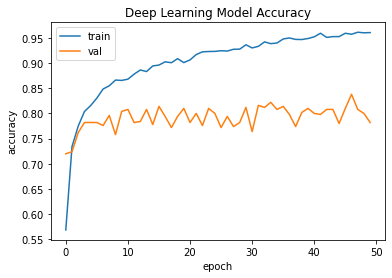

In [45]:
#Using random filters
def sample_spherical(npoints, ndim=3):
    vec = np.random.randn(ndim, npoints)
    vec /= np.linalg.norm(vec, axis=0)
    return vec

filters = []
for i in range(16):
    filters.append(np.reshape(sample_spherical(1,16),(4,4)))

topfiltlearn(X,y,filters,pool=True)


kNN Results:  [0.55668866 0.57888422 0.53841537]
Gradient Boosting Results:  [0.68926215 0.71865627 0.70228091]


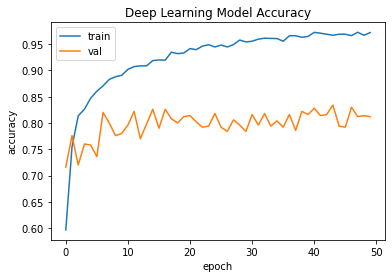

In [46]:
#Using random filters
def sample_spherical(npoints, ndim=3):
    vec = np.random.randn(ndim, npoints)
    vec /= np.linalg.norm(vec, axis=0)
    return vec

filters = []
for i in range(50):
    filters.append(np.reshape(sample_spherical(1,9),(3,3)))

topfiltlearn(X,y,filters,pool=True)
